<h1> LZ Discrimination Calculator </h1>

In [1]:
from __future__ import division
import sys
home_dir=!echo "$HOME"
sys.path.insert(2,home_dir[0]+'/iPyNb/NERSC_Import')#point to iPyNb in $HOME directory
from pyNEST import *
import time
%pylab inline
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # set size of figures"
plt.rcParams.update({'font.size': 24})

Populating the interactive namespace from numpy and matplotlib


In [2]:
#WS cuts
S1_min=0
S1_max=20
S2raw_min=450
#NS1_coin_req=3

In [6]:
g1s=[0.05,0.075,0.12]
drift_fields=[50,85, 90, 100, 160,290,630]
discrim=np.zeros((size(g1s),size(drift_fields)))
discrim_gauss=np.zeros((size(g1s),size(drift_fields)))

##############################################################################
#Generate Flat ER and NR spectra:
##############################################################################
#LZ

for ii, g1 in enumerate(g1s):
    for jj, df in enumerate(drift_fields):
        NEST=NEST_setup(g1=g1,f_drift=df,custom=True)
        S1_bin_cen_n, mean_S2oS1_n, std_S2oS1_n, S1_bin_cen_e, mean_S2oS1_e, std_S2oS1_e, \
        E_bin_cen_e, Eff_e, E_bin_cen_n, Eff_n, num_leak_e, num_total_e, leak_gauss_e, sNR \
        = genBands(NEST=NEST,S2raw_min=S2raw_min,nSim=2e6) #change to 1e5 to speed up

        #calculate NR ER discrimination
        leak_cut= S1_bin_cen_e<S1_max
        discrim[ii,jj]=100*(1-sum(num_leak_e[leak_cut])/sum(num_total_e[leak_cut]))
        discrim_gauss[ii,jj]=100*(1-mean(leak_gauss_e[leak_cut]))
        
        print (g1,df,discrim[ii,jj],discrim_gauss[ii,jj])

(0.05, 50, 99.357460398298159, 99.435652597328811)
(0.05, 85, 99.500828051941966, 99.537656155817032)
(0.05, 90, 99.533601494652643, 99.540795933224572)
(0.05, 100, 99.547553343422095, 99.55610833105051)
(0.05, 160, 99.616816740552068, 99.60305125199676)
(0.05, 290, 99.691218346621369, 99.5966747665111)
(0.05, 630, 99.709498607779707, 99.435997144900071)
(0.075, 50, 99.391226604867839, 99.512811670982032)
(0.075, 85, 99.484470015238031, 99.582750055429571)
(0.075, 90, 99.536353577330814, 99.6058167841433)
(0.075, 100, 99.528915998000727, 99.61608263680472)
(0.075, 160, 99.588670101203448, 99.655512830758425)
(0.075, 290, 99.704895160122675, 99.704608694275493)
(0.075, 630, 99.721312753352038, 99.525312503043281)
(0.12, 50, 99.656370582250304, 99.722693633944587)
(0.12, 85, 99.666172106824931, 99.736851010820999)
(0.12, 90, 99.649746527091978, 99.736104923436741)
(0.12, 100, 99.675989981960527, 99.743224130842393)
(0.12, 160, 99.74870006314282, 99.779400490714139)
(0.12, 290, 99.7790446

In [8]:
discrim

array([[ 99.3574604 ,  99.50082805,  99.53360149,  99.54755334,
         99.61681674,  99.69121835,  99.70949861],
       [ 99.3912266 ,  99.48447002,  99.53635358,  99.528916  ,
         99.5886701 ,  99.70489516,  99.72131275],
       [ 99.65637058,  99.66617211,  99.64974653,  99.67598998,
         99.74870006,  99.77904463,  99.82921377]])

<h1> Plot discrimnation </h1>

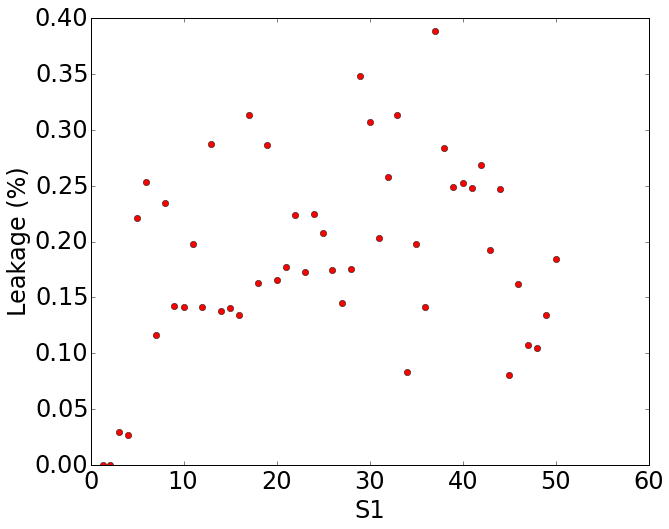

In [5]:
plot(S1_bin_cen_e,100*(num_leak_e/num_total_e),'or')
xlabel('S1')
ylabel('Leakage (%)')

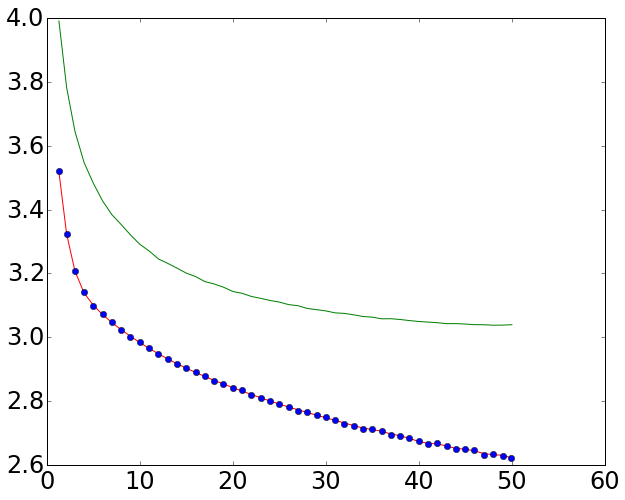

In [6]:
#Plot ER, NR mean and NR interpolation

#sNR = ip.UnivariateSpline(S1_bin_cen_n, mean_S2oS1_n,s=.002)

plot(S1_bin_cen_n,sNR(S1_bin_cen_n),'r')
plot(S1_bin_cen_n,mean_S2oS1_n,'o')
plot(S1_bin_cen_e,mean_S2oS1_e)

In [5]:
nsig=(2-1)/1
sp.special.erfc(nsig/sqrt(2))/2

0.15865525393145707

<h1> Plot Discrimination vs. WIMP mass </h1>

In [ ]:
mWmp=np.logspace(1.35,3,10)
discrim=np.zeros_like(mWmp)
discrim_gauss=np.zeros_like(mWmp)

##############################################################################
#Generate Flat ER and NR spectra for given WIMP mass:
##############################################################################
#LZ
NEST=NEST_setup() #defults to LZ nominal parameters

for ii, mW in enumerate(mWmp):
    if mW<35:
        nSim=2e8
    else:
        nSim=1e6
    
    S1_bin_cen_n, mean_S2oS1_n, std_S2oS1_n, S1_bin_cen_e, mean_S2oS1_e, std_S2oS1_e, \
    E_bin_cen_e, Eff_e, E_bin_cen_n, Eff_n, num_leak_e, num_total_e, leak_gauss_e, sNR \
    = genBands(NEST=NEST,S2raw_min=S2raw_min,nSim=nSim,mWmp=mW) #change to 1e5 to speed up

    #calculate NR ER discrimination
    leak_cut= S1_bin_cen_e<S1_max
    discrim[ii]=100*(1-sum(num_leak_e[leak_cut])/sum(num_total_e[leak_cut]))
    discrim_gauss[ii]=100*(1-mean(leak_gauss_e[leak_cut]))
    
    print (mW,discrim_gauss[ii])

In [ ]:
plt.plot(mWmp,discrim,'--sk',markersize=8)
xscale('log')
xlabel('WIMP mass (GeV)')
ylabel('Background rejection (%) at 50% Signal Acceptance')

savefig('figs/Discrim.png')